# Testing Random Forest with Various Run Splits

### Imports

In [72]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [73]:
from venus_ml import RandomForest, VenusDataset, standardize, create_differential_features
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Testing Parameters

In [74]:
run1 = 5
run2 = 9
random_state = 88
rf_args = {
    "n_estimators":10, 
    "max_features": "log2",
    "random_state": random_state
}

### Dataset Config + Initialization

In [75]:
def get_features(names, mean=True, std=False):
    out_list = []
    for name in names:
        if mean:
            out_list.append(name + "_mean")
        if std:
            out_list.append(name + "_std")
    return out_list

In [76]:
tiny_list = ["inj_mbar", "bias_v", "bias_i", "extraction_i"]
less_tiny_list = tiny_list + ["ext_mbar", "k18_fw", "k18_ref", "g28_fw", "puller_i"]
even_less_tiny_list = less_tiny_list + ["inj_i", "ext_i", "mid_i", "sext_i", "x_ray_source", "x_ray_exit"]
data_set_config = {
    "file_path": "../accumulated_weekend_data_2023_02_27.parquet",
    "input_columns": get_features(tiny_list, std=False),
    "output_columns": ["fcv1_i_mean"],
    "run_selection": (run1, run2),
}
dataset = VenusDataset(**data_set_config)
x, y = dataset.to_numpy()
print(x.shape, y.shape)

(3865, 4) (3865, 1)


## Train and Validation with Run 5

In [77]:
train_inputs, train_outputs, valid_inputs, valid_outputs = dataset.get_run_splits((run1,), random_state=random_state)
train_outputs, valid_outputs = train_outputs.ravel(), valid_outputs.ravel()
print(train_inputs.shape, train_outputs.shape, valid_inputs.shape, valid_outputs.shape)

(2844, 4) (2844,) (712, 4) (712,)


In [78]:
rf = RandomForest(rf_args)
rf.fit(train_inputs, train_outputs)
mse = rf.evaluate(valid_inputs, valid_outputs)
score = rf.model.score(valid_inputs, valid_outputs)
print(f"MSE: {mse} | Score: {score} | Max Depth: {max([estimator.tree_.max_depth for estimator in rf.model.estimators_])}")

MSE: 2.6893546822432197e-10 | Score: 0.9844008697083438 | Max Depth: 30


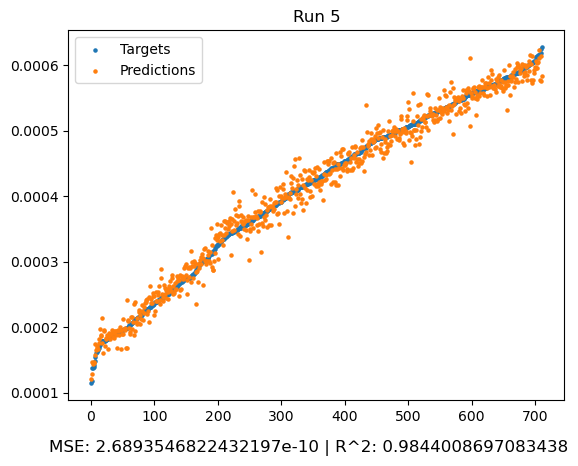

In [79]:
x_axis = range(valid_inputs.shape[0])
indices = np.argsort(valid_outputs)
targets = valid_outputs[indices]
predictions = rf.predict(valid_inputs)[indices]
plt.scatter(x_axis, targets, s=5, label="Targets", )
plt.scatter(x_axis, predictions,s=5, label="Predictions")
txt = f"MSE: {mse} | R^2: {score}"
plt.title("Run 5")
plt.figtext(0.5, 0.001, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.legend()
plt.show()

## Train and Validation with Runs 5 & 9

In [80]:
train_inputs, train_outputs, valid_inputs, valid_outputs = dataset.get_run_splits((run1, run2), random_state=random_state)
train_outputs, valid_outputs = train_outputs.ravel(), valid_outputs.ravel()
print(train_inputs.shape, train_outputs.shape, valid_inputs.shape, valid_outputs.shape)

(3091, 4) (3091,) (774, 4) (774,)


In [81]:
rf = RandomForest(rf_args)
rf.fit(train_inputs, train_outputs)
mse = rf.evaluate(valid_inputs, valid_outputs)
score = rf.model.score(valid_inputs, valid_outputs)
print(f"MSE: {mse} | Score: {score} | Max Depth: {max([estimator.tree_.max_depth for estimator in rf.model.estimators_])}")

MSE: 4.1677571206545924e-10 | Score: 0.9766266251231678 | Max Depth: 31


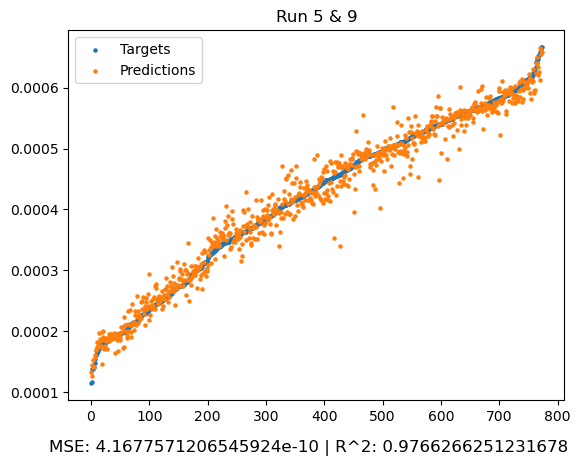

In [82]:
x_axis = range(valid_inputs.shape[0])
indices = np.argsort(valid_outputs)
targets = valid_outputs[indices]
predictions = rf.predict(valid_inputs)[indices]
plt.scatter(x_axis, targets, s=5, label="Targets", )
plt.scatter(x_axis, predictions,s=5, label="Predictions")
plt.title("Run 5 & 9")
txt = f"MSE: {mse} | R^2: {score}"
plt.figtext(0.5, 0.001, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.legend()
plt.show()

## Train on 5 and Validate on 9

In [83]:
data = dataset.get_runs((run1,run2))
train_inputs, train_outputs, valid_inputs, valid_outputs = data[run1][0], data[run1][1], data[run2][0], data[run2][1]
train_outputs, valid_outputs = train_outputs.ravel(), valid_outputs.ravel()
print(train_inputs.shape, train_outputs.shape, valid_inputs.shape, valid_outputs.shape)

(3556, 4) (3556,) (309, 4) (309,)


In [84]:
rf = RandomForest(rf_args)
rf.fit(train_inputs, train_outputs)
mse = rf.evaluate(valid_inputs, valid_outputs)
score = rf.model.score(valid_inputs, valid_outputs)
print(f"MSE: {mse} | Score: {score} | Max Depth: {max([estimator.tree_.max_depth for estimator in rf.model.estimators_])}")

MSE: 4.555447844843195e-09 | Score: 0.7519223754346203 | Max Depth: 28


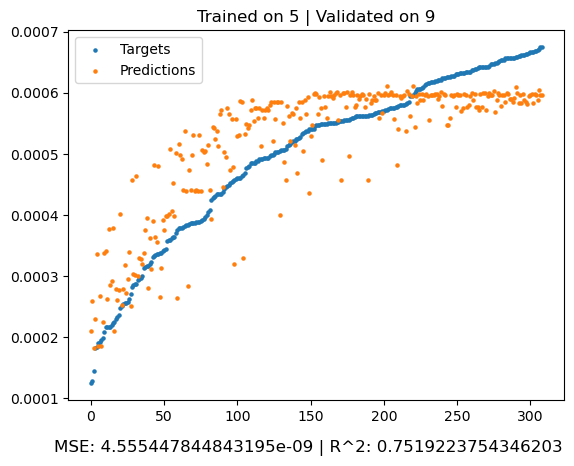

In [85]:
x_axis = range(valid_inputs.shape[0])
indices = np.argsort(valid_outputs)
targets = valid_outputs[indices]
predictions = rf.predict(valid_inputs)[indices]
plt.scatter(x_axis, targets, s=5, label="Targets", )
plt.scatter(x_axis, predictions,s=5, label="Predictions")
plt.title("Trained on 5 | Validated on 9")
txt = f"MSE: {mse} | R^2: {score}"
plt.figtext(0.5, 0.001, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.legend()
plt.show()